<a href="https://colab.research.google.com/github/berry1200/Python-Programs/blob/main/cifar10_cnn_model_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting Up Environment and Libraries**
First, make sure you have all the necessary libraries installed and set up in Google Colab.

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Verify GPU access (optional)
device_name = tf.test.gpu_device_name()
if device_name != '':
    print(f'GPU detected: {device_name}')
else:
    print("No GPU found. Using CPU.")


No GPU found. Using CPU.


# **Data Preparation**
Download and preprocess the CIFAR-10 dataset.

In [2]:
# Load CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


# **Visualizing the Dataset**
It’s good practice to visualize a few images from the dataset.

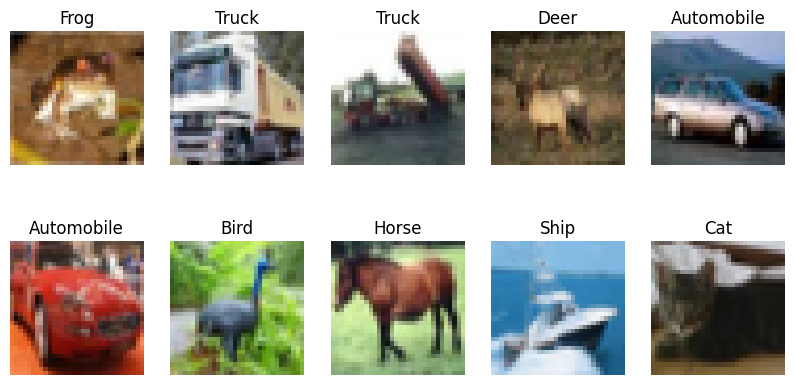

In [3]:
# Visualize sample images
import numpy as np

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()


# **Constructing the CNN Model**
Build a simple yet effective CNN architecture for image classification.

In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

# **Training the Model**
Train the CNN and monitor its performance on the validation set.

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.2857 - loss: 1.9414 - val_accuracy: 0.5121 - val_loss: 1.4137
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.4800 - loss: 1.4407 - val_accuracy: 0.5598 - val_loss: 1.2498
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.5390 - loss: 1.2865 - val_accuracy: 0.6003 - val_loss: 1.1411
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 74ms/step - accuracy: 0.5841 - loss: 1.1856 - val_accuracy: 0.6387 - val_loss: 1.0378
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.6167 - loss: 1.1079 - val_accuracy: 0.6420 - val_loss: 1.0271
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.6294 - loss: 1.0616 - val_accuracy: 0.6559 - val_loss: 0.9930
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.6446 - loss: 1.0113 - val_accuracy: 0.6654 - val_loss: 0.9512
Epoch 8/10


# **Evaluating the Model**
Test the model on the test data and analyze its performance.

In [6]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6801 - loss: 0.9078
Test Accuracy: 0.68


# **Plotting Accuracy and Loss**
Visualize the training and validation accuracy/loss for better insights.

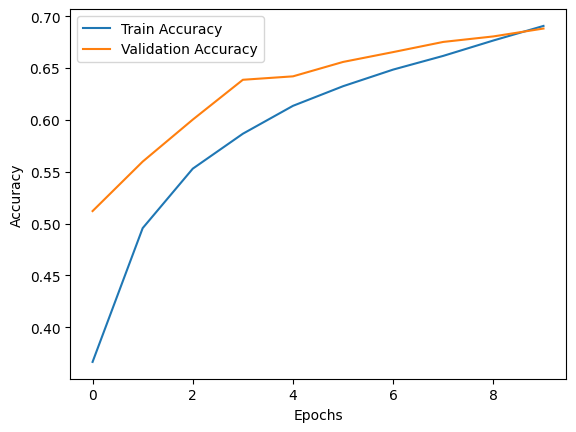

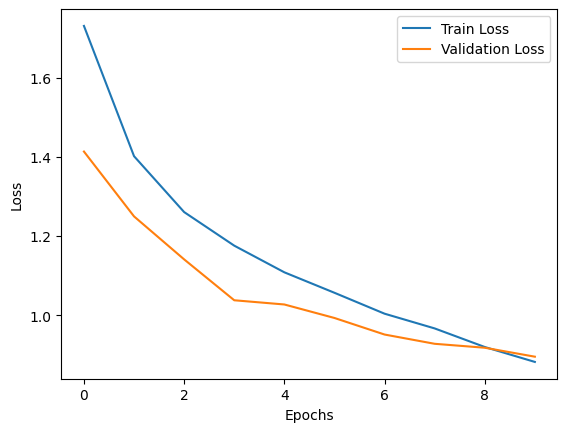

In [7]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Saving the Model**
Save the trained model for further use, such as integration into a robotic system.

In [8]:
# Save the trained model
model.save('cifar10_cnn_model.h5')
print("Model saved as cifar10_cnn_model.h5")


Model saved as cifar10_cnn_model.h5


# **Preparing for Robotics Integration**
Design a method to integrate the model into a humanoid robot like Nao. For example:

Capture images: Use Nao’s camera module to capture real-world images.

Preprocess: Normalize and resize images to (32, 32, 3).

Classify: Use the saved model to predict classes and act based on results.

In [9]:
# Example: Loading the saved model and making a prediction
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('cifar10_cnn_model.h5')

# Example input: reshape and preprocess a sample image
sample_image = np.expand_dims(x_test[0], axis=0)  # Use the first test image
prediction = model.predict(sample_image)

# Display prediction
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted Class: Cat
